# Understanding Signal Processing

In [1]:
pip install librosa

  Created wheel for librosa: filename=librosa-0.8.0-py3-none-any.whl size=201381 sha256=4bacf97e852db4f043e4b576b58a08b5afb1c33f15c04c62d693130f277439d7
  Stored in directory: c:\users\82102\appdata\local\pip\cache\wheels\de\1e\aa\d91797ae7e1ce11853ee100bee9d1781ae9d750e7458c95afb
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23145 sha256=2c256e27b507b93f394578852fe80534fdfd2a746d5b1c919b978a431c8810db
  Stored in directory: c:\users\82102\appdata\local\pip\cache\wheels\ba\7b\eb\213741ccc0678f63e346ab8dff10495995ca3f426af87b8d88
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320723 sha256=01d3cb92230a7f06cd602ffc20de5308ed0fc1aab353f56faa1ecd9623deffcb
  Stored in directory: c:\users\82102\appdata\local\pip\cache\wheels\a0\18\0a\8ad18a597d8333a142c9789338a96a6208f1198d290ece356c
Successfully built librosa audioread resampy
Note: you may need to restart the kernel to use updated packages.


# Understanding FFT output

In [12]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
def fft_plot(audio, sampling_rate):
    n = len(audio)
    T = 1/sampling_rate
    yf = scipy.fft(audio)
    xf = np.linspace(0.0, 1.0/(2.0*T), int(n/2))
    fig, ax = plt.subplots()
    ax.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    plt.grid()
    plt.xlabel('Frequency -->')
    plt.ylabel('Magnitude')
    return plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

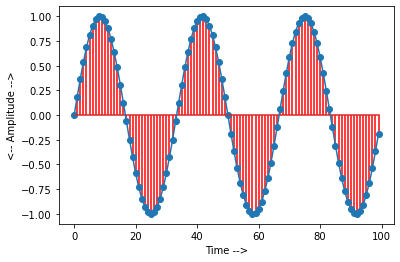

In [2]:
samples = 100
f = 3
x = np.arange(samples)
y1 = np.sin(2*np.pi*f*(x/samples))
plt.figure()
plt.stem(x,y1,'r',)
plt.plot(x,y1)
plt.xlabel('Time -->')
plt.ylabel('<-- Amplitude -->')
plt.show

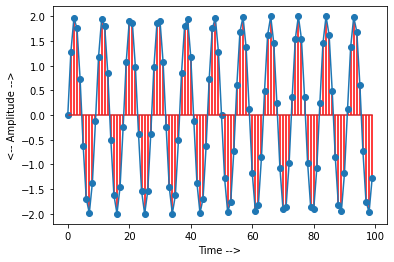

In [3]:
f = 11
x = np.arange(samples)
y2 = 2 * np.sin(2*np.pi*f*(x/samples))
plt.figure()
plt.stem(x,y2,'r',)
plt.plot(x,y2)
plt.xlabel('Time -->')
plt.ylabel('<-- Amplitude -->')
plt.show()

In [4]:
y3 = y1 + y2

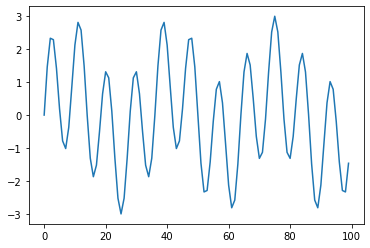

In [6]:
plt.plot(y3)

C:\Users\82102\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  import sys


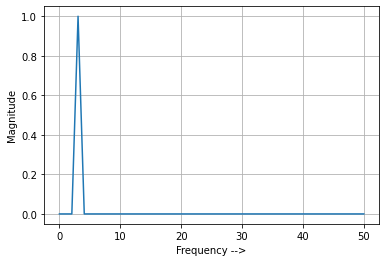

In [13]:
fft_plot(y1,100)

C:\Users\82102\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  import sys


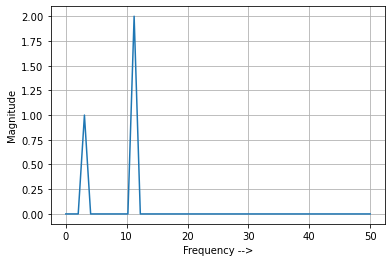

In [14]:
fft_plot(y3,100)

# Spectrogram

- X axis: Time
- Y axis: Frequency
- Color: Magnitude of the observed frequency

In [15]:
def spectrogram(samples, sample_rate, stride_ms = 10.0, 
                          window_ms = 20.0, max_freq = None, eps = 1e-14):

    stride_size = int(0.001 * sample_rate * stride_ms)
    window_size = int(0.001 * sample_rate * window_ms)

    # Extract strided windows
    truncate_size = (len(samples) - window_size) % stride_size
    samples = samples[:len(samples) - truncate_size]
    nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
    nstrides = (samples.strides[0], samples.strides[0] * stride_size)
    windows = np.lib.stride_tricks.as_strided(samples, 
                                          shape = nshape, strides = nstrides)
    
    assert np.all(windows[:, 1] == samples[stride_size:(stride_size + window_size)])

    # Window weighting, squared Fast Fourier Transform (fft), scaling
    weighting = np.hanning(window_size)[:, None]
    
    fft = np.fft.rfft(windows * weighting, axis=0)
    fft = np.absolute(fft)
    fft = fft**2
    
    scale = np.sum(weighting**2) * sample_rate
    fft[1:-1, :] *= (2.0 / scale)
    fft[(0, -1), :] /= scale
    
    # Prepare fft frequency list
    freqs = float(sample_rate) / window_size * np.arange(fft.shape[0])
    
    # Compute spectrogram feature
    ind = np.where(freqs <= max_freq)[0][-1] + 1
    specgram = np.log(fft[:ind, :] + eps)
    return specgram

Reference: https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520

# Dataset Source
https://www.kaggle.com/c/tensorflow-speech-recognition-challenge/data

## Convert every files into 'hash_keyword_trial.wav' form

In [96]:
path = 'C:\\Users\\82102\\Desktop\\audio\\'
os.chdir(path)
import os
import re
import csv
import pandas as pd
csvname='hash_key_trial.csv'
h=[]
for key in os.listdir():
    os.chdir(path+key)
    for filename in os.listdir():
        name = re.split('_',filename)
        os.rename(path+key+'\\'+filename, path+key+'\\'+name[0]+'_'+key+'_'+name[2])
        if name[0] not in h:
            h.append(name[0])
h = pd.DataFrame(h)
h.to_csv(csvname,index=False,header=False)